In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


# **READING THE DATA**

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

# **CHECKING WHETHER THE DATA HAS ANY NULL VALUES OR NOT**

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**WE CAN SEE THAT SOME COLUMNS HAVE THE NULL VALUES**

In [5]:
df.dtypes ## by using .dtypes we will get the data type of each column

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# **DEALING WITH THE MISSING VALUES**

***'GENDER'' COLUMN HAS 13 NULL VALUES.***

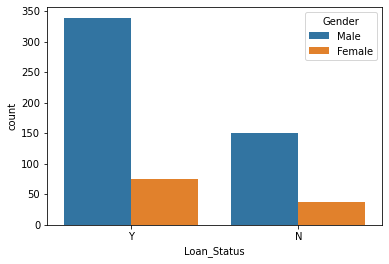

In [6]:
import seaborn as sns
sns.countplot('Loan_Status',hue='Gender',data=df)

**BY ANALYSING THE GRAPH WE SEE THAT THE MAJORITY OF GENDER IS MALE SO, WE ARE GOING TO FILL GENDER COLUMN'S NULL VALUES WITH 'MALE'**

In [7]:
df['Gender'] = df['Gender'].fillna('Male')

***'MARRIED'COLUMN HAS 3 NULL VALUES***

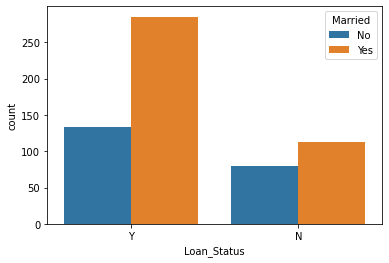

In [8]:
sns.countplot('Loan_Status',hue='Married',data=df)

**WE CAN UNDERSTAND THAT MARRIED PEOPLE WILL GET THE LOAN. SO AS THE MAJORITY SAYS WE WILL FILL THE 'MARRIED' COLUMN'S NULL VALUES WITH 'YES'**

In [9]:
df['Married'] = df['Married'].fillna('Yes')

***'DEPENDENTS' COLUMN HAS 15 NULL VALUES***

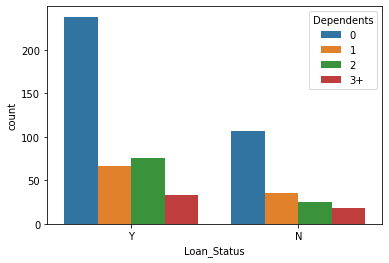

In [10]:
sns.countplot('Loan_Status',hue='Dependents',data=df)

**Since most of the dependents are 0 we are gonna fill with it with 0**

In [11]:
df['Dependents'] = df['Dependents'].fillna('0')

***'SELF-EMPLOYED' COLUMN HAS 32 NULL VALUES***

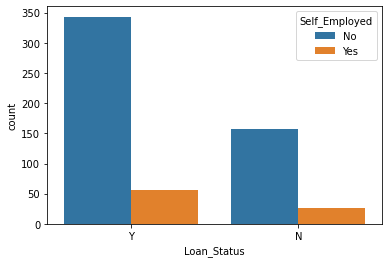

In [12]:
sns.countplot('Loan_Status' , hue = 'Self_Employed' , data = df)

**WE CAN SEE HERE THAT THE 'SELF_EMPLOYED' COLUMN' HAS THE MAJORITY 'NO'. SO WE ARE GOING TO FILL THAT COLUMN WITH 'NO'**

In [13]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

***NOW THE DEALING WITH THE 'LOANAMOUNT' COLUMN WHICH HAS 22 NULL VALUES.***

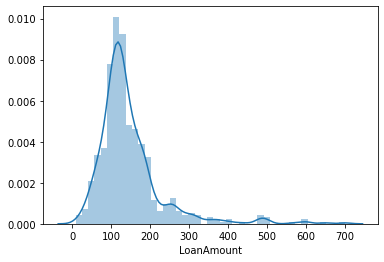

In [14]:
sns.distplot(df['LoanAmount'])

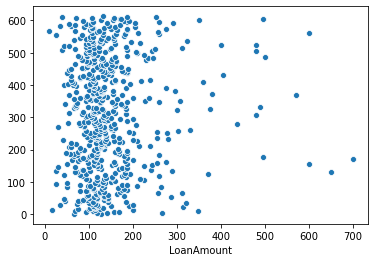

In [15]:
sns.scatterplot(df['LoanAmount'],y=np.arange(0,614))

**THE OUTLIERS IN THE DATA SEEMS TO BE RIGHT SKEWED ,  SO WE WILL NOT FILL THE VALUES BY THE MEAN OF THIS DATA, WE ARE GOING TO TAKE THE MEAN WHICH DOES NOT CONTAIN OUTLIERS.**

In [16]:
mean=df[df['LoanAmount']<=400]['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace=True)

***'LOAN_AMOUNT_TERM' COLUMN HAS 14 NULL VALUES***

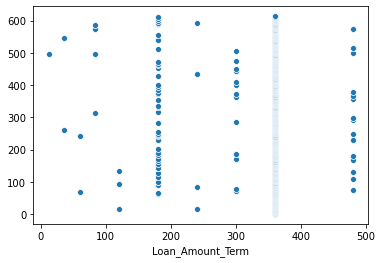

In [17]:
sns.scatterplot(df['Loan_Amount_Term'],y=np.arange(0,614))

**TO FILL THE MISSING VALUES WE WILL USE MODE**

In [18]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

***'CREDIT_HISTORY' HAS 50 NULL VALUES***

In [19]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

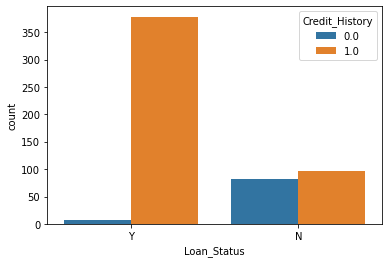

In [20]:
sns.countplot('Loan_Status',hue='Credit_History',data=df)

**TO FILL THE MISSING VALUES WE WILL USE MODE**

In [21]:
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

**NOW WE WILL CHECK WHETHER THE DATA STILL HAS ANY NULL VALUES OR NOT**

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.186851,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


# **ONE-HOT ENCODING WILL BE DONE TO CHANGE THE CATEGORICAL DATA INTO NUMERICAL DATA BEFORE WE DEPLOY IT INTO OUR MODEL SO THAT THE PROCESS BECOMES EASY.**

In [24]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_data = df.copy()

**CHECKING WHETHER ALL OUR DUPLICATE VALUES HAVE BEEN REMOVED OR NOT, SUCH AS yes,YES,no,NO......**

In [25]:
print(df_data['Gender'].unique())
print(df_data['Married'].unique())
print(df_data['Education'].unique())
print(df_data['Self_Employed'].unique())
print(df_data['Property_Area'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


**TRANSFORMING THE CATEGORICAL DATA INTO NUMERICAL DATA 0,1,2..**

In [26]:
df_data['Gender'] = lb.fit_transform(df_data['Gender'])
df_data['Married'] = lb.fit_transform(df_data['Married'])
df_data['Education'] = lb.fit_transform(df_data['Education'])
df_data['Self_Employed'] = lb.fit_transform(df_data['Self_Employed'])
df_data['Property_Area'] = lb.fit_transform(df_data['Property_Area'])
df_data['Loan_Status'] = lb.fit_transform(df_data['Loan_Status'])
df_data['Dependents'] = lb.fit_transform(df_data['Dependents'])

**LET US CHECK IT**

In [27]:
print(df_data['Gender'].unique())
print(df_data['Married'].unique())
print(df_data['Education'].unique())
print(df_data['Self_Employed'].unique())
print(df_data['Property_Area'].unique())
print(df_data['Loan_Status'].unique())
print(df_data['Dependents'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]
[0 1 2 3]


In [28]:
df_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,137.186851,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


**YOU CAN SEE THAT THE DATA HAS BEEN TRANSFROMED COMPLETELY INTO THE NUMERICAL DATA**

# **DEPLOYING THE DATA INTO OUR MODEL**

In [29]:
df_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **STEP_1:- INITIALISATION OF X and Y**

In [30]:
X = df_data.drop(['Loan_ID','Loan_Status'],axis=1)
Y = df_data[['Loan_Status']]

# **STEP_2:- SPLITING TRAINING AND TESTING SETS**

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=43)

# **STEP_3 :- UNDERGOING STANDARDISATION PROCESS**

***BECAUSE OUR DATA IS SO BIG***

In [32]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(xtrain)
xtr = std.transform(xtrain)

# **STEP_4:- TRAINING OUR MODEL ON TRAINING DATA**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lgt = LogisticRegression()


In [34]:
lgt.fit(xtr,ytrain)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

# **STEP_5:- PREDICTING ON TEST VALUES**

***TRANSFORMING THE TESTING FEATURES INTO STANDARD FORMS***

In [35]:
xts = std.transform(xtest)

***NOW PREDICTING ON TRANSFORMED TESTING FEATURES.***

In [36]:
predict = lgt.predict(xts)

In [37]:
print(predict)

[1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1]


***GETTING THE ACCURACY REPORT***

In [38]:

print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.94      0.47      0.62        62
           1       0.79      0.98      0.87       123

    accuracy                           0.81       185
   macro avg       0.86      0.73      0.75       185
weighted avg       0.84      0.81      0.79       185



# **HENCE,THE ACCURACY LEVEL IS OF ABOUT 86%**